## Introduction

## Business Statement
Despite the availability of vaccines, many individuals choose not to receive them, leaving communities vulnerable to seasonal flu outbreaks and pandemics like H1N1. Public health organizations need to understand the factors influencing vaccination uptake to design effective, targeted interventions.

Key Business Questions:

1. What factors influence an individual's likelihood to receive the H1N1 and seasonal flu vaccines?
2. How can predictive modeling help identify high-risk groups who are less likely to vaccinate?
3. What actionable strategies can public health organizations implement to increase vaccination rates?

## Objectives
To develop a predictive model to estimate the likelihood of individuals receiving two specific vaccines: the H1N1 vaccine and the seasonal flu vaccine.

## Data
The data for this competition comes from the National 2009 H1N1 Flu Survey (NHFS). https://www.drivendata.org/competitions/66/flu-shot-learning/data/

The source dataset comes with the following data use restrictions:
1. Use the data in these data files for statistical reporting and analysis only.
2. Make no use of the identity of any person or establishment discovered inadvertently and advise the Director, NCHS, of any such discovery (1 (800) 232-4636).
3. Not link these data files with individually identifiable data from other NCHS or non-NCHS data files.

## Exploratory Data Analysis

In [18]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

#### Load the Data

In [19]:
# Load the data 
train_data=pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')
test_data=pd.read_csv('test_set_features.csv')

In [20]:
# Basic info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [21]:
# test_data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [22]:
# Check missing values in train_features
train_data.isnull().sum().sort_values()


respondent_id                      0
sex                                0
hhs_geo_region                     0
census_msa                         0
race                               0
age_group                          0
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_antiviral_meds         71
behavioral_outside_home           82
behavioral_large_gatherings       87
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_touch_face            128
behavioral_avoidance             208
household_children               249
household_adults                 249
opinion_h1n1_risk                388
opinion_h1n1_vacc_effective      391
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
health_worker                    804
child_under_6_months             820
chronic_med_condition            971
education                       1407
m

#### Dealing with missing values

In [23]:
# Fill missing categorical features with the mode
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Fill missing numerical features with the median
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(train_data[col].median(), inplace=True)


**Drop unwanted columns**

In [24]:
train_data.drop(columns=['employment_industry', 'employment_occupation', 'hhs_geo_region', 'marital_status', 'rent_or_own'])

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,employment_status,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Employed,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not in Labor Force,Non-MSA,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Employed,"MSA, Principle City",1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Employed,"MSA, Not Principle City",0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Employed,Non-MSA,1.0,0.0


**Check for duplicates**


In [25]:
train_data.duplicated().sum()

0

**Analyze target variables**

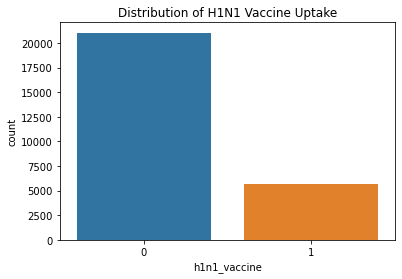

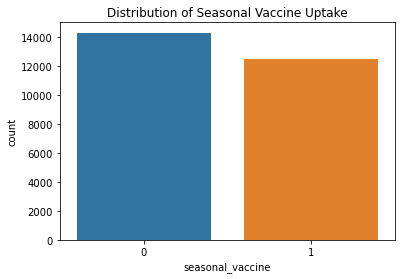

In [26]:
# Distribution of vaccine targets
sns.countplot(x='h1n1_vaccine', data=train_labels)
plt.title('Distribution of H1N1 Vaccine Uptake')
plt.show()

sns.countplot(x='seasonal_vaccine', data=train_labels)
plt.title('Distribution of Seasonal Vaccine Uptake')
plt.show()


**Observation**
> Most of the respondents didn't get either of the vaccines

**Analyze the features**

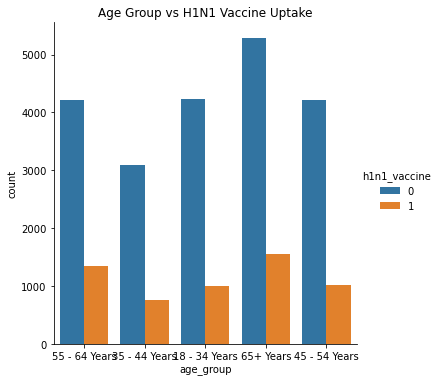

In [27]:
#Age Group vs Vaccine Uptake
sns.catplot(x="age_group", hue="h1n1_vaccine", data=pd.concat([train_data, train_labels], axis=1), kind="count")
plt.title("Age Group vs H1N1 Vaccine Uptake")
plt.show()




**Observation**
>Respondents aged 65 years and older did not receive the H1N1 vaccine.

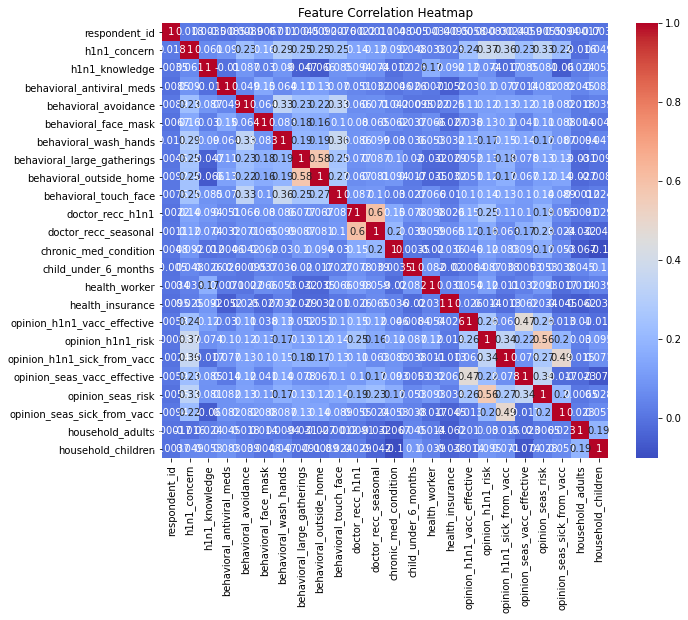

In [28]:
# Correlation heatmap
correlation = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

#### Data Preprocessing

In [29]:
# Label encoding for categorical features
encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col] = encoder.transform(test_data[col])


In [30]:
# Combine features and labels
data = train_data.copy()
data['h1n1_vaccine'] = train_labels['h1n1_vaccine']
data['seasonal_vaccine'] = train_labels['seasonal_vaccine']

# Split data for H1N1 and seasonal vaccine prediction
X_h1n1 = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = data['h1n1_vaccine']
X_seasonal = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y_seasonal = data['seasonal_vaccine']

X_h1n1_train, X_h1n1_val, y_h1n1_train, y_h1n1_val = train_test_split(X_h1n1, y_h1n1, test_size=0.2, random_state=42)
X_seasonal_train, X_seasonal_val, y_seasonal_train, y_seasonal_val = train_test_split(X_seasonal, y_seasonal, test_size=0.2, random_state=42)



#### Model Building

**Baseline Model (Logistic Regression Model)**

In [31]:
# H1N1 Logistic Regression
lr_h1n1 = LogisticRegression(max_iter=1000)
lr_h1n1.fit(X_h1n1_train, y_h1n1_train)
y_h1n1_pred = lr_h1n1.predict(X_h1n1_val)
print("H1N1 Vaccine Logistic Regression Report:")
print(classification_report(y_h1n1_val, y_h1n1_pred))

# Seasonal Logistic Regression
lr_seasonal = LogisticRegression(max_iter=1000)
lr_seasonal.fit(X_seasonal_train, y_seasonal_train)
y_seasonal_pred = lr_seasonal.predict(X_seasonal_val)
print("Seasonal Vaccine Logistic Regression Report:")
print(classification_report(y_seasonal_val, y_seasonal_pred))



H1N1 Vaccine Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4212
           1       0.63      0.33      0.43      1130

    accuracy                           0.82      5342
   macro avg       0.73      0.64      0.66      5342
weighted avg       0.80      0.82      0.79      5342

Seasonal Vaccine Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2891
           1       0.73      0.72      0.73      2451

    accuracy                           0.75      5342
   macro avg       0.75      0.75      0.75      5342
weighted avg       0.75      0.75      0.75      5342



**Observation**
> The H1N1 vaccine model has higher accuracy (82%) than the seasonal vaccine model (75%), but its performance for minority Class 1 is suboptimal, suggesting potential room for improvement.
1. For the H1N1 vaccine, the model performs well in identifying individuals who did not receive the vaccine (Class 0), but struggles with accurately predicting those who received it (Class 1), as shown by the lower recall and F1-score for Class 1.
2. For the seasonal vaccine, the model achieves more balanced performance across both classes, with similar precision, recall, and F1-scores.

**Decision Tree Classifier**

In [32]:
# Initialize Decision Tree classifiers
dt_h1n1 = DecisionTreeClassifier(random_state=42)
dt_seasonal = DecisionTreeClassifier(random_state=42)

# Train the models
dt_h1n1.fit(X_h1n1_train, y_h1n1_train)
dt_seasonal.fit(X_seasonal_train, y_seasonal_train)

# Predict probabilities
dt_h1n1_probs = dt_h1n1.predict_proba(X_h1n1_val)[:, 1]
dt_seasonal_probs = dt_seasonal.predict_proba(X_seasonal_val)[:, 1]

# Calculate AUC
h1n1_auc = roc_auc_score(y_h1n1_val, dt_h1n1_probs)
seasonal_auc = roc_auc_score(y_seasonal_val, dt_seasonal_probs)
print(f"H1N1 Vaccine AUC: {h1n1_auc}")
print(f"Seasonal Vaccine AUC: {seasonal_auc}")



H1N1 Vaccine AUC: 0.6365241745035256
Seasonal Vaccine AUC: 0.676569090387436


**Observation**
> The Seasonal vaccine model is performing slightly better than the H1N1 vaccine model based on these AUC scores. However, both are somewhat lower than ideal, indicating there may be room for improvement in the models' predictive accuracy.

#### Model Evaluation

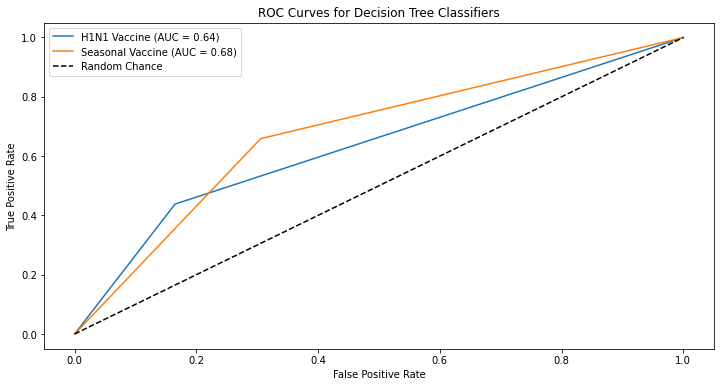

In [33]:
# Plot ROC curves
plt.figure(figsize=(12, 6))

# H1N1 ROC Curve
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_h1n1_val, dt_h1n1_probs)
plt.plot(fpr_h1n1, tpr_h1n1, label=f"H1N1 Vaccine (AUC = {h1n1_auc:.2f})")

# Seasonal ROC Curve
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_seasonal_val, dt_seasonal_probs)
plt.plot(fpr_seasonal, tpr_seasonal, label=f"Seasonal Vaccine (AUC = {seasonal_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree Classifiers')
plt.legend()
plt.show()


**Observation**
> Both models have AUCs greater than 0.5, indicating that both are performing better than random guessing. However, neither model has an exceptionally high AUC, suggesting there is room for improvement.
The Seasonal Vaccine model is performing slightly better than the H1N1 Vaccine model, as its curve is higher, and its AUC is 0.68 compared to 0.64 for H1N1.

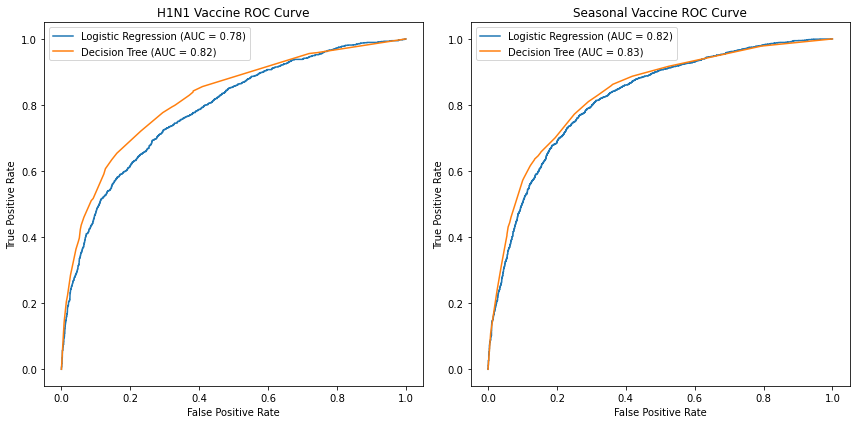

In [37]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, log_loss

# Logistic Regression for H1N1 Vaccine
h1n1_lr_auc = roc_auc_score(y_h1n1_val, lr_h1n1.predict_proba(X_h1n1_val)[:, 1])
h1n1_lr_fpr, h1n1_lr_tpr, _ = roc_curve(y_h1n1_val, lr_h1n1.predict_proba(X_h1n1_val)[:, 1])

# Decision Tree for H1N1 Vaccine
h1n1_dt_auc = roc_auc_score(y_h1n1_val, dt_h1n1.predict_proba(X_h1n1_val)[:, 1])
h1n1_dt_fpr, h1n1_dt_tpr, _ = roc_curve(y_h1n1_val, dt_h1n1.predict_proba(X_h1n1_val)[:, 1])

# Logistic Regression for Seasonal Vaccine
seasonal_lr_auc = roc_auc_score(y_seasonal_val, lr_seasonal.predict_proba(X_seasonal_val)[:, 1])
seasonal_lr_fpr, seasonal_lr_tpr, _ = roc_curve(y_seasonal_val, lr_seasonal.predict_proba(X_seasonal_val)[:, 1])

# Decision Tree for Seasonal Vaccine
seasonal_dt_auc = roc_auc_score(y_seasonal_val, dt_seasonal.predict_proba(X_seasonal_val)[:, 1])
seasonal_dt_fpr, seasonal_dt_tpr, _ = roc_curve(y_seasonal_val, dt_seasonal.predict_proba(X_seasonal_val)[:, 1])

# Plot ROC Curves
plt.figure(figsize=(12, 6))

# H1N1 Vaccine
plt.subplot(1, 2, 1)
plt.plot(h1n1_lr_fpr, h1n1_lr_tpr, label=f"Logistic Regression (AUC = {h1n1_lr_auc:.2f})")
plt.plot(h1n1_dt_fpr, h1n1_dt_tpr, label=f"Decision Tree (AUC = {h1n1_dt_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("H1N1 Vaccine ROC Curve")
plt.legend()

# Seasonal Vaccine
plt.subplot(1, 2, 2)
plt.plot(seasonal_lr_fpr, seasonal_lr_tpr, label=f"Logistic Regression (AUC = {seasonal_lr_auc:.2f})")
plt.plot(seasonal_dt_fpr, seasonal_dt_tpr, label=f"Decision Tree (AUC = {seasonal_dt_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Seasonal Vaccine ROC Curve")
plt.legend()

plt.tight_layout()
plt.show()




**Observation**
> Decision Tree consistently outperforms Logistic Regression in both tasks, although the difference in AUC is not significant.
Both models show good performance, with AUC values above 0.75 for both vaccines, which is considered acceptable for classification tasks.